# US Energy Spot Price Analysis

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Data Import

In [ ]:
caminho_pasta = ".../Data"

dataframes = []
def formatar_data(data):
    try:
        # Conversion to  'DD/MM/YYYY'
        return pd.to_datetime(data, format='%d/%m/%Y')
    except ValueError:
        try:
            # Conversion to 'DD/MM/YY'
            return pd.to_datetime(data, format='%d/%m/%y')
        except ValueError:
            return pd.NaT
        
for arquivo in os.listdir(caminho_pasta):
    if arquivo.endswith('.xls') or arquivo.endswith('.xlsx'):
        caminho_arquivo = os.path.join(caminho_pasta, arquivo)
        print(caminho_arquivo)
        df = pd.read_excel(caminho_arquivo)
        df[df.columns[1]] = df[df.columns[1]].apply(formatar_data)
        dataframes.append(df)
    
# Concat to one DataFrame
df = pd.concat(dataframes, ignore_index=True)

In [ ]:
# Treats names of Hubs
df[df.columns[0]] = df[df.columns[0]].replace(to_replace='.*Indiana.*', value='MISO',  regex=True)
df[df.columns[0]] = df[df.columns[0]].replace(to_replace='.*Nepool.*', value='ISONE',  regex=True)
df[df.columns[0]] = df[df.columns[0]].replace(to_replace='.*NEPOOL.*', value='ISONE',  regex=True)
df[df.columns[0]] = df[df.columns[0]].replace(to_replace='.*PJM.*', value='PJM',  regex=True)
df[df.columns[0]] = df[df.columns[0]].replace(to_replace='.*ERCOT.*', value='ERCOT',  regex=True)
df[df.columns[0]] = df[df.columns[0]].replace(to_replace='.*Mid.*', value='Northwest',  regex=True)
df[df.columns[0]] = df[df.columns[0]].replace(to_replace='.*NP.*', value='CAISO North',  regex=True)
df[df.columns[0]] = df[df.columns[0]].replace(to_replace='.*NP15.*', value='CAISO North',  regex=True)
df[df.columns[0]] = df[df.columns[0]].replace(to_replace='.*SP-15.*', value='CAISO South',  regex=True)
df[df.columns[0]] = df[df.columns[0]].replace(to_replace='.*SP15.*', value='CAISO South',  regex=True)
df[df.columns[0]] = df[df.columns[0]].replace(to_replace='.*SP 15.*', value='CAISO South',  regex=True)
df[df.columns[0]] = df[df.columns[0]].replace(to_replace='.*Palo.*', value='SPP', regex=True)

print( df[df.columns[0]].unique()) 

linhas_com_nulos = df[df.isnull().any(axis=1)]

print("Linhas com Valores Nulos:")
print(linhas_com_nulos)

In [ ]:
# Separate each Hub
hub_dict = dict(tuple(df.groupby(df.columns[0])))
# Show DataFrames
for hub, df in hub_dict.items():
    print(f"\nGrupo {hub}:\n")
    print(df)

In [ ]:
# Show statistics 
for hub, df in hub_dict.items():
    print(f"\nEstatísticas para DataFrame {hub}:\n")
    print(df.describe())

### Show Hub charts

In [ ]:
data = df.columns[1]
preco = df.columns[6]
for hub, df in hub_dict.items():
#for nome_arquivo, df in dataframes.items():
    plt.figure(figsize=(20, 8))
    if isinstance(df, pd.DataFrame) and data in df.columns and preco in df.columns:
        # Remove lines with invalid data 
        df = df.dropna(subset=[data])
        # Classifies DataFrame by columm 'Trade date' 
        df = df.sort_values(data)
        # Plots lines of DataFrame
        plt.plot(df[data], df[preco], label=hub)
        # Addds title
        plt.xlabel('Trade Date')
        plt.ylabel('Wtd Avg Price $/MWh')
        plt.title('Wtd Avg Price $/MWh x Trade date')
        # Adds legend
        plt.legend()
        # Show chart
        plt.grid(True)
        plt.show()

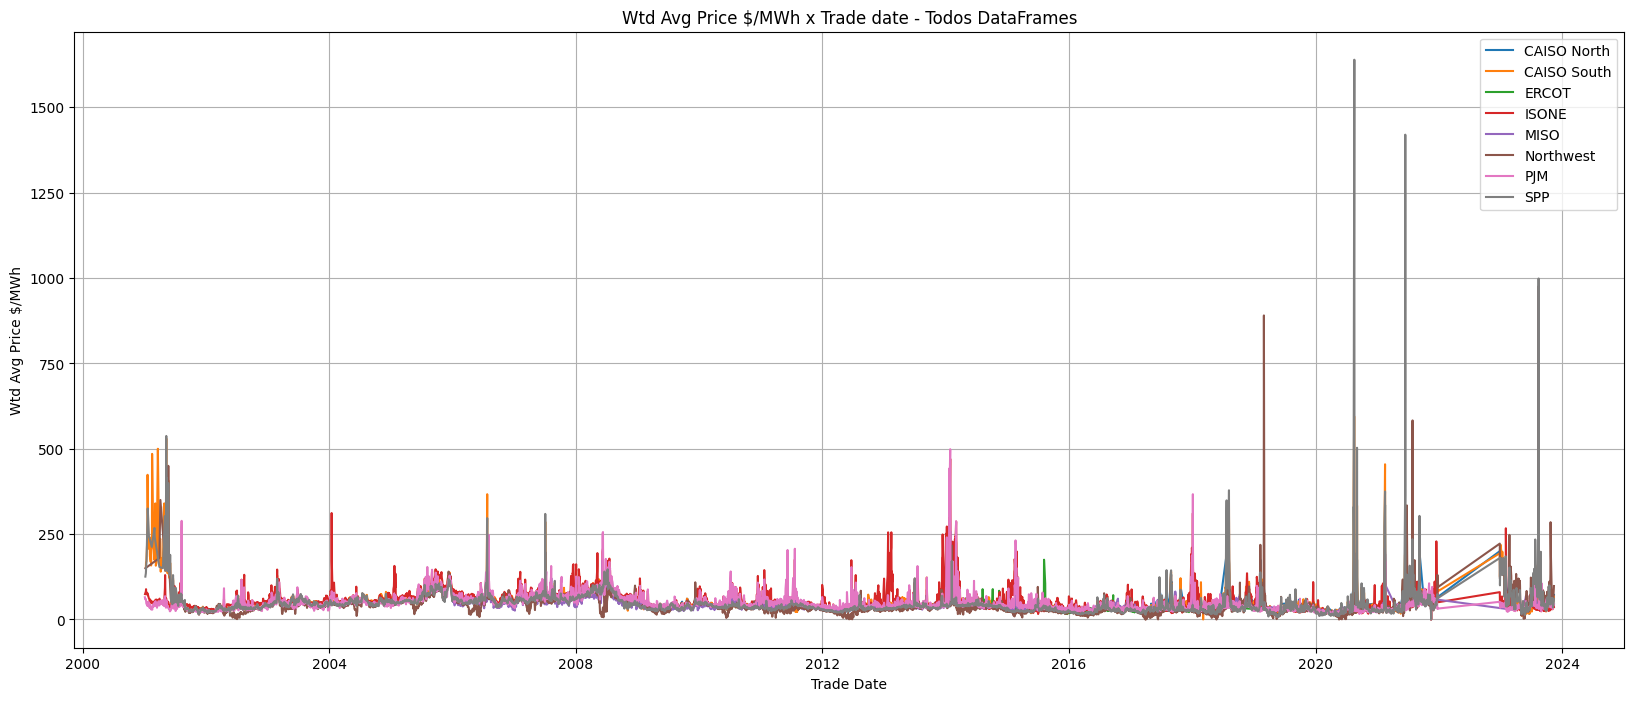

In [7]:
plt.figure(figsize=(20, 8))

for hub, df in hub_dict.items():
    if isinstance(df, pd.DataFrame) and data in df.columns and preco in df.columns:
        # Removes invalids values
        df = df.dropna(subset=[data])
        # Classifies the DataFrame by columm 'Trade date'
        df = df.sort_values(data)
        # Plots each DataFrame line
        plt.plot(df[data], df[preco], label=hub)

# Adds lables and title
plt.xlabel('Trade Date')
plt.ylabel('Wtd Avg Price $/MWh')
plt.title('Wtd Avg Price $/MWh x Trade date - Todos DataFrames')

# Adds legend
plt.legend()

# Show
plt.grid(True)
plt.show()

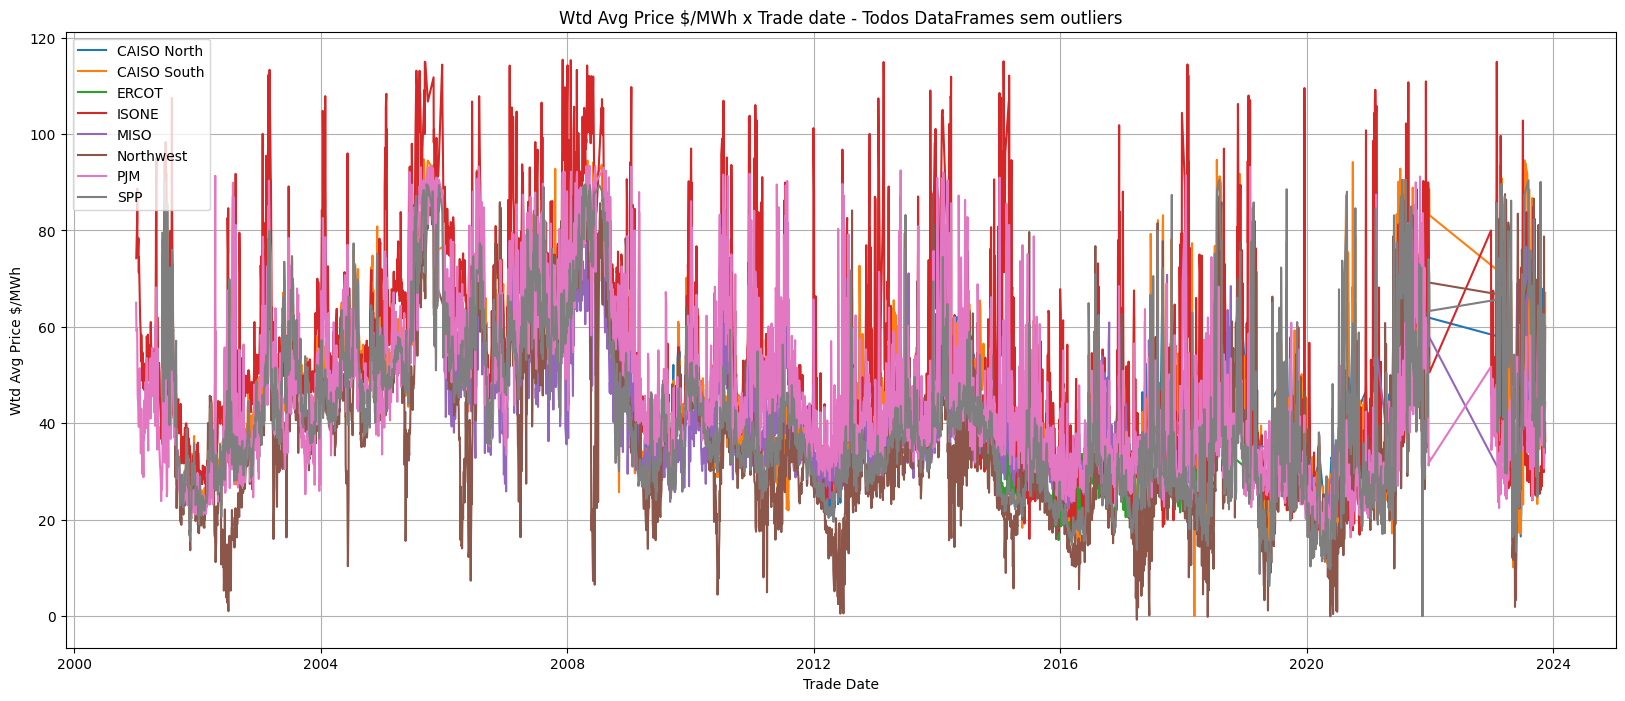

In [8]:
plt.figure(figsize=(20, 8))
# calculate IQR (interquartile range) para coluna preço
for hub, df in hub_dict.items():
    Q1 = df[preco].quantile(0.25)
    Q3 = df[preco].quantile(0.75)
    IQR = Q3 - Q1
    # identifies outliers
    threshold = 1.5
    outliers = df[(df[preco] < Q1 - threshold * IQR) | (df[preco] > Q3 + threshold * IQR)]
    # removes outliers
    df = df.drop(outliers.index)
    df = df.sort_values(data)
    plt.plot(df[data], df[preco], label=hub)

plt.xlabel('Trade Date')
plt.ylabel('Wtd Avg Price $/MWh')
plt.title('Wtd Avg Price $/MWh x Trade date - Todos DataFrames sem outliers')

plt.legend()

plt.grid(True)
plt.show()